# Data Analysis and Review

In [4]:
from google.colab import drive
import os
import matplotlib.pyplot as plt

drive.mount('/content/drive')

podcasts_folder_path = "/content/drive/MyDrive/Podcasts"
episode_path = "/content/drive/MyDrive/Podcasts/Awel Marra - أول مرة/cleaned_transcripts/؟(Date❤️) بودكاست أول مرة # 001 - إزاي نتصرف في أول مرة.txt"

Mounted at /content/drive


## List of Spotify podcasts used in analysis


In [5]:
folder_list = []
for item in os.listdir(podcasts_folder_path):
  item_path = os.path.join(podcasts_folder_path, item)
  if os.path.isdir(item_path):
    folder_list.append(item)
folder_list

['FoodCast',
 'نيللى وحكايات الدايت بودكاست Nilly Shams',
 'إيه المشكلة',
 'البشمهندس',
 'من غير مونتاج',
 'حواديت حقيقية',
 'karohat - كاروهات',
 'Awel Marra - أول مرة']

## Number of podcasts and total number of episodes used in analysis


In [6]:
text_files = []
for folder in folder_list:
  folder_path = os.path.join(podcasts_folder_path, folder)
  raw_transcripts_path = os.path.join(folder_path, "raw_transcripts")
  for item in os.listdir(raw_transcripts_path):
    item_path = os.path.join(raw_transcripts_path, item)
    if os.path.isfile(item_path) and item.lower().endswith(".txt"):
      text_files.append(item_path)

print("Number of podcasts: " + str(len(folder_list)))
print("Number of documents: " + str(len(text_files)))

Number of podcasts: 8
Number of documents: 154


## Number of words per episode and average word count

Documents with highest words
لیه الدایت بیبوظ - خسر کل فلوسه فی مطعم - کریم امساعیل - Foodcast 2.txt: 22836
ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt: 22699
Documents with least words
S2-EP1- البداية.txt: 359
إيه المشكلة في الشتيمة ؟.txt: 170


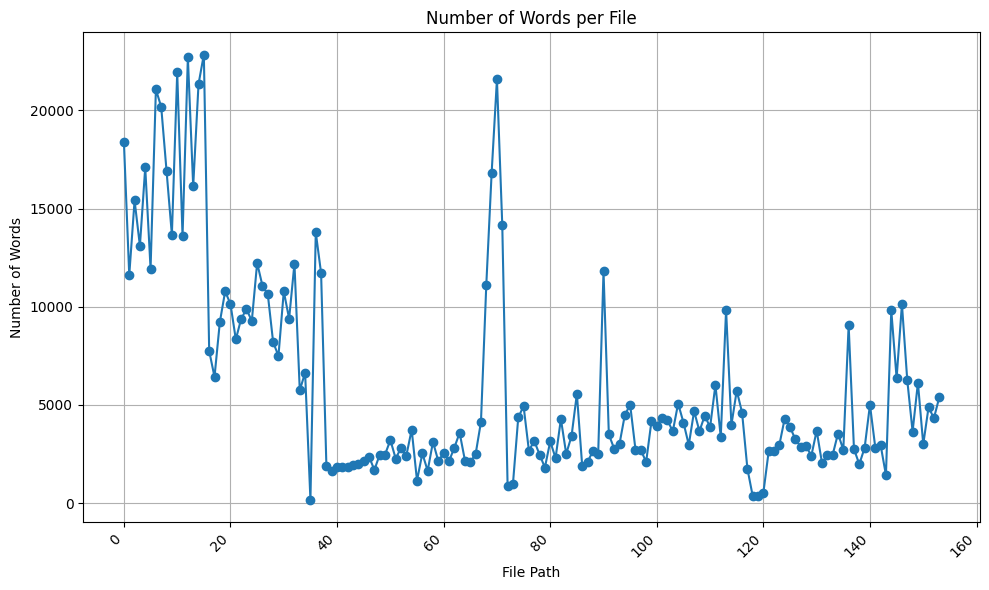

Average number of words per document: 5992.876623376624


In [37]:
num_words_list = []
for file_path in text_files:
  with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
    words = text.split()
    num_words = len(words)
  # print(f"Number of words in {(file_path.split('/'))[-1]}: {num_words}")
  num_words_list.append(num_words)

file_names = [os.path.basename(file_path) for file_path in text_files]

sorted_indices = sorted(range(len(num_words_list)), key=lambda i: num_words_list[i], reverse=True)

print("Documents with highest words")
for i in sorted_indices[:2]:  # Get the top 2 highest counts
    print(f"{file_names[i]}: {num_words_list[i]}")

print("Documents with least words")
for i in sorted_indices[-2:]:  # Get the top 2 lowest counts
    print(f"{file_names[i]}: {num_words_list[i]}")

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(range(len(file_names)), num_words_list, marker='o', linestyle='-')

plt.xlabel("File Path")
plt.ylabel("Number of Words")
plt.title("Number of Words per File")
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

print("Average number of words per document: " + str(sum(num_words_list)/len(num_words_list)))

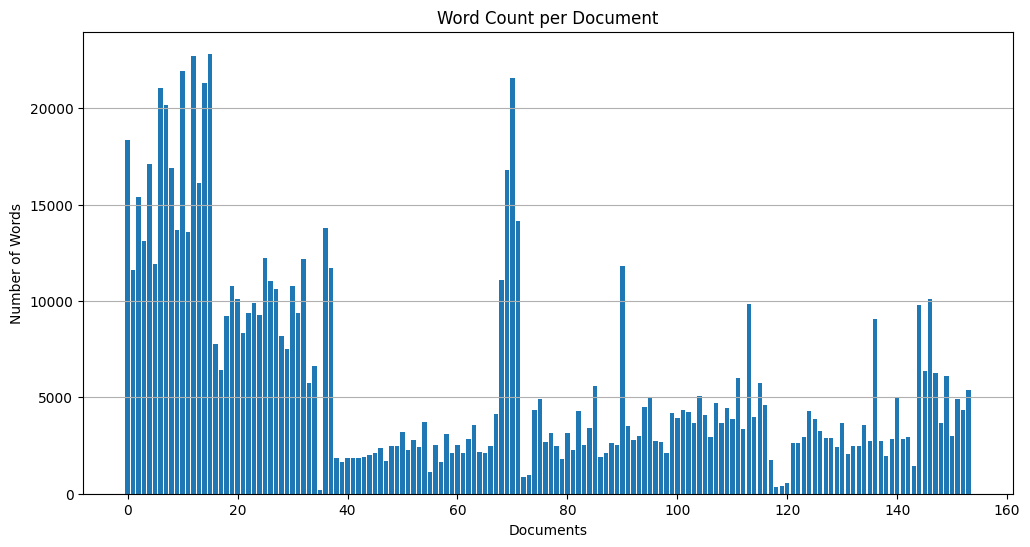

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(file_names)), num_words_list)

plt.xlabel("Documents")
plt.ylabel("Number of Words")
plt.title("Word Count per Document")
plt.grid(axis='y')

plt.show()

## Vocabulary size and word frequency

In [9]:
from collections import Counter

all_words = []
for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        all_words.extend(words)

word_counts = Counter(all_words)
vocab_size = len(word_counts)

print(f"Vocabulary Size: {vocab_size}")
print("Word Frequencies (Top 10):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Vocabulary Size: 102343
Word Frequencies (Top 10):
في: 23385
أنا: 18625
إللي: 13067
يعني: 13022
من: 11127
مش: 11114
إن: 11046
ده: 10602
هو: 10411
ما: 9868


In [10]:
!pip install arabic-reshaper python-bidi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 9.2 MB/s eta 0:00:00


<ipython-input-11-476cc9d093dd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=words, x=counts, palette="viridis")


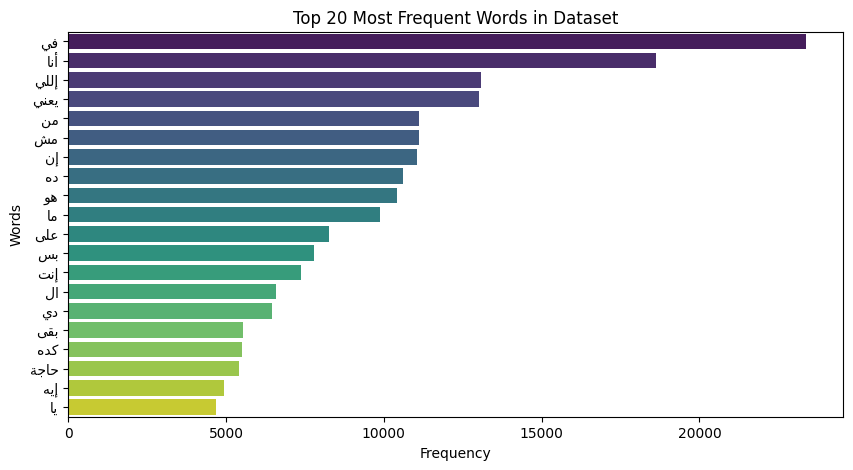

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

words = [get_display(arabic_reshaper.reshape(w)) for w in words]

plt.figure(figsize=(10, 5))
sns.barplot(y=words, x=counts, palette="viridis")

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()


# Data Preprocessing & Cleaning

In [12]:
new_dir = "/content/cleaned_transcripts"
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as infile:
        text = infile.read().lower()

    new_file_path = os.path.join(new_dir, os.path.basename(file_path))
    with open(new_file_path, 'w', encoding='utf-8') as outfile:
        outfile.write(text)
print("Saved documents in a new folder /content/cleaned_transcripts...")

episode_paths = []
for episode_path in os.listdir(new_dir):
  episode_path = os.path.join(new_dir, episode_path)
  episode_paths.append(episode_path)

Saved documents in a new folder /content/cleaned_transcripts...


## Tokenization

In [13]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

tokens_per_episode = []
for episode_path in episode_paths:
  with open(episode_path, 'r', encoding='utf-8') as file:
    text = file.read()
    tokens = nltk.word_tokenize(text)
    tokens_per_episode.append(tokens)

# Print the tokens for the last episode as an example
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['0:00', 'أنا', 'حاسة', 'إن', 'جدتي', 'ماتت', '.', 'بس', 'أنا', 'الوحيدة', 'إللي', 'حاسة', 'بده', '.', 'مش', 'عارفة', 'مين', 'إللي', 'اتجنن', 'أنا', 'ولا', 'عيلتي؟', 'دي؟', 'كانت', 'أغرب', '.', 'بداية', 'رسالة', 'جت', 'لي', 'من', 'شخص', 'مجهول', 'على', 'أسك', 'انستجرام', '.', 'كتبت', 'قريت', 'صاحبة', 'الرسالة', 'الخاصة', 'بجدتها،', 'تبعت', 'لي', '.', '0:17', 'لقيت', 'فيك', 'كان', 'تبعتلي', 'رسايل', 'وتاليا', '.', 'وده', 'كان', 'محتوى؟', 'يا', 'أهلا', 'وسهلا', 'بكل', 'حد', 'بيسمعني', '.', 'دلوقتي', '.', 'أنا', 'محمود', 'فرج', 'بعمل', 'الحلقات', 'إللي', 'بقدمها', 'لكم', 'دي،', 'وأتمنى', 'أكون', 'ضيف', 'خفيف', 'عليكم', 'في', 'الشوية', 'الصغيرين', 'إللي', 'بنقضي', 'همسوا', 'لو', 'بتسمعني', 'على', 'اليوتيوب', '.', '0:35', 'ما', 'تنساش', 'تعمل', 'سبسكرايب', 'وتفعل', 'الجرس،', 'ولو', 'بتسمعني', 'على', 'سبوتيفاي', 'أو', 'أبل', 'أو', 'جوجل', 'بودكاست،', 'ما', 'تنساش', 'تبعت', 'الحلقة', 'لصحابك', '.', 'يلا', 'بينا', 'نبدأ', 'الحدوتة', '.', 'أنا', 'بترعش', 'وأنا', 'بكتب', 'ده،', 'فكرت', 'اتصل', '

## Stemming

In [14]:
from nltk.stem.isri import ISRIStemmer

stemmer = ISRIStemmer()

stemmed_tokens_per_episode = []
for tokens in tokens_per_episode:
  nltk_stemedList = []
  for word in tokens:
      nltk_stemedList.append(stemmer.stem(word))
  stemmed_tokens_per_episode.append(nltk_stemedList)

print(nltk_stemedList)

['0:00', 'انا', 'حسة', 'ان', 'جدت', 'اتت', '.', 'بس', 'انا', 'وحد', 'الل', 'حسة', 'بده', '.', 'مش', 'عرف', 'مين', 'الل', 'اتج', 'انا', 'ولا', 'عيلتي؟', 'دي؟', 'كانت', 'غرب', '.', 'بدي', 'رسل', 'جت', 'لي', 'من', 'شخص', 'جهل', 'على', 'اسك', 'انستجرام', '.', 'كتب', 'قرت', 'صحب', 'رسل', 'خصة', 'جدتها،', 'تبع', 'لي', '.', '0:17', 'لقت', 'فيك', 'كان', 'عتل', 'رسيل', 'وتل', '.', 'وده', 'كان', 'محتوى؟', 'يا', 'اهل', 'سهل', 'بكل', 'حد', 'سمع', '.', 'دلق', '.', 'انا', 'حمد', 'فرج', 'عمل', 'حلق', 'الل', 'قدم', 'لكم', 'دي،', 'أتمنى', 'اكن', 'ضيف', 'خفف', 'علي', 'في', 'شوة', 'صغر', 'الل', 'نقض', 'همس', 'لو', 'سمع', 'على', 'تيب', '.', '0:35', 'ما', 'نسش', 'عمل', 'سبسكرايب', 'فعل', 'جرس،', 'ولو', 'سمع', 'على', 'سبوتيفاي', 'او', 'ابل', 'او', 'جوجل', 'بودكاست،', 'ما', 'نسش', 'تبع', 'حلق', 'صحب', '.', 'يلا', 'بين', 'بدأ', 'حدت', '.', 'انا', 'رعش', 'وأن', 'كتب', 'ده،', 'فكر', 'تصل', 'شرط', 'بس', 'مش', 'عرف', 'انا', 'جنن', 'ولا', 'عيل', 'كله', 'جننت؟', 'يمكن', 'اكن', 'في', 'كبس', 'أصحى', 'قريب؟', 'انا', '

## Lemmatization


In [ ]:
!pip install camel-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 816.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
!camel_data -i all

The following packages will be installed: 'disambig-ranking-cache-calima-egy-r13', 'sentiment-analysis-arabert', 'disambig-bert-unfactored-msa', 'disambig-bert-unfactored-glf', 'morphology-db-egy-r13', 'disambig-bert-unfactored-egy', 'dialectid-model26', 'disambig-bert-unfactored-lev', 'morphology-db-msa-s31', 'disambig-mle-calima-msa-r13', 'disambig-mle-calima-egy-r13', 'dialectid-model6', 'morphology-db-glf-01', 'sentiment-analysis-mbert', 'disambig-ranking-cache-calima-msa-r13', 'disambig-ranking-cache-calima-lev-01', 'ner-arabert', 'morphology-db-lev-01', 'disambig-ranking-cache-calima-glf-01', 'morphology-db-msa-r13'
Extracting package 'disambig-ranking-cache-calima-egy-r13': 100% 320M/320M [00:03<00:00, 96.1MB/s]
Extracting package 'sentiment-analysis-arabert': 100% 542M/542M [00:02<00:00, 195MB/s]
Extracting package 'disambig-bert-unfactored-msa': 100% 445M/445M [00:05<00:00, 83.3MB/s]
Extracting package 'disambig-bert-unfactored-glf': 100% 442M/442M [00:04<00:00, 97.3MB/s]
Extr

In [ ]:
from camel_tools.utils.dediac import dediac_ar
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer

db = MorphologyDB.builtin_db()
analyzer = Analyzer(db)

lemmatized_tokens_per_episode = []
for tokens in tokens_per_episode:
  lemmaList = []
  for word in tokens:
      lemmatized_word = analyzer.analyze(word)
      if len(lemmatized_word) > 0:
        lemmaList.append(dediac_ar(lemmatized_word[0]['lex']))
      else:
        lemmaList.append(word)
  lemmatized_tokens_per_episode.append(lemmaList)

print(lemmaList)

['0:00', 'سلام', 'علي', 'عزيز', 'مستمع', 'أهل', 'بكم', 'في', 'حلق', 'جديد', 'من', 'آية', 'من', 'غير', 'من', 'غير', 'رقم', 'واحد', 'في', 'مصر', 'من', 'ناحية', 'آل', 'بس', 'مش', 'من', 'حاجة', 'دي', 'بس', 'قسم', 'من', 'مش', 'عارف', 'إخبار', 'عامل', 'آية', 'كلة', 'تمام', 'حاجة', 'لي', 'بنتكلم', 'علية', 'النهاردة', '100', '%', '100', '%', 'حاجة', 'لي', 'دع', 'بالي', 'سينما', 'آل', 'آل', 'مش', 'لازم', 'أنى', 'تكون', 'مشغل', 'دماغ', 'كثير', 'وتاخد', 'تفرج', 'علي', 'فيلم', 'ألف', 'عظيم', 'مش', 'عارف', 'ميناء', 'لا', 'لا', 'أنى', 'بس', 'داخل', 'عش', 'ٱستمتع', 'تمام', 'ود', 'دي', 'دي', 'نوع', 'ما', 'معظم', 'حاجة', 'ناس', 'بتستخدم', 'سينما', 'علشانه', 'أنى', 'بس', 'رائح', 'عش', 'ٱستمتع', 'عش', 'فصل', 'دماغ', 'ف', 'كل', 'حاجة', 'لي', 'مغطيها،', 'في', 'حلقة', 'دي', 'هتكون', 'لي', 'دعوة', 'فيلم', 'لي', 'هي', 'بس', 'معمول', 'علشان', 'تمتع', 'عامة', 'من', 'آل', 'من', 'ناس', 'سيب', 'من', 'فيلم', 'المهرجانات،', 'سيب', 'بق', 'من', 'آل', 'من', 'فيلم', 'آل', 'ماشي', 'ممكن', 'نقول', 'علي', 'بين', 'قوس', 'فن

## Stop word removal

In [15]:
from nltk.corpus import stopwords

nltk.download('stopwords')

print(stopwords.words('arabic'))

stopwords_plus = stopwords.words('arabic') + ['انه','اي','كنت','او','انا', 'الل', 'يعن', 'ان', 'مش', 'ده', 'انت', 'بقى', 'ال', 'دي', 'حجة', 'كده', 'اه', 'ايه', 'بتع', 'يه؟', 'هها']

punctuations="؟?:!.,;"

filtered_tokens_per_episode = []
for tokens in stemmed_tokens_per_episode:
  filtered_words = [word for word in tokens if not (word in stopwords_plus or word in punctuations or ':' in word)]
  filtered_tokens_per_episode.append(filtered_words)

# Save the tokens back to the same file
for i in range(len(filtered_tokens_per_episode)):
  with open(episode_paths[i], 'w', encoding='utf-8') as file:
    file.write(' '.join(filtered_tokens_per_episode[i]))

print(filtered_words)


['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['حسة', 'جدت', 'اتت', 'وحد', 'حسة', 'بده', 'عرف', 'مين', 'اتج', 'عيلتي؟', 'دي؟', 'كانت', 'غرب', 'بدي', 'رسل', 'جت', 'شخص', 'جهل', 'اسك', 'انستجرام', 'كتب', 'قرت', 'صحب', 'رسل', 'خصة', 'جدتها،', 'تبع', 'لقت', 'فيك', 'عتل', 'رسيل', 'وتل', 'وده', 'محتوى؟', 'اهل', 'سهل', 'بكل', 'حد', 'سمع', 'دلق', 'حمد', 'فرج', 'عمل', 'حلق', 'قدم', 'دي،', 'أتمنى', 'اكن', 'ضيف', 'خفف', 'علي', 'شوة', 'صغر', 'نقض', 'همس', 'سمع', 'تيب', 'نسش', 'عمل', 'سبسكرايب', 'فعل', 'جرس،', 'سمع', 'سبوتيفاي', 'ابل', 'جوجل', 'بودكاست،', 'نسش', 'تبع', 'حلق', 'صحب', 'يلا', 'بدأ', 'حدت', 'رعش', 'وأن', 'كتب', 'ده،', 'فكر', 'تصل', 'شرط', 'عرف', 'جنن', 'عيل', 'كله', 'جننت؟', 'يمكن', 'اكن', 'كبس', 'أصحى', 'قريب؟', 'حسة', 'جدت', 'تت،', 'وحد', 'حسة', 'بده', 'حيدة،', 'امي', 'أبويا،', 'حفد', 'وحد', 'جدتي،', 'لإن', 'خلي', 'تجز', 'عيش', 'دين', 'اني', 'اهل', 'وأن', 'شغل', 'لقت', 'اما', 'كلم', 'تقل', 'جدت', 'وقع', 'وهي', 'طبخ', 'تخض', 'قلت', 'طيب', 'هجل', 'دلق', 'قلت', 'لأ', 'عبش', 'خلك', 'معا', 'ورح', 'شفى', 'وقل', 'عرض', 'كسر', 'حوض', 'ق

Word frequency after stop word removal and lemmatization:



In [16]:
all_words = []
for tokens in filtered_tokens_per_episode:
    all_words.extend(tokens)

word_counts = Counter(all_words)
vocab_size = len(word_counts)

print(f"Vocabulary Size: {vocab_size}")
print("Word Frequencies (Top 10):")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

Vocabulary Size: 27790
Word Frequencies (Top 10):
عمل: 9070
عرف: 5253
ناس: 4864
احن: 4114
كلم: 4098
عشن: 3970
عيز: 3795
وحد: 3251
يلم: 3201
فكر: 3097
مكن: 2953
كتر: 2850
حاج: 2812
خلص: 2713
شكل: 2695
جدا: 2592
اول: 2561
ثلا: 2435
زي: 2408
لأ: 2361


<ipython-input-17-9208d222c94e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=words, x=counts, palette="viridis")


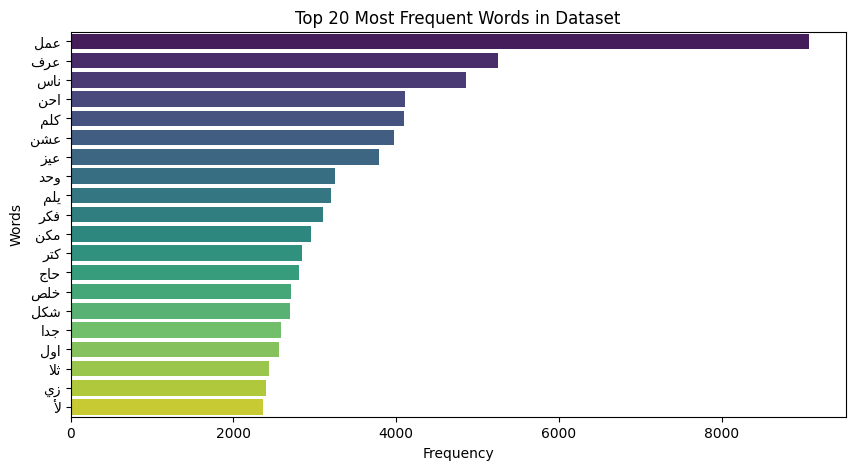

In [17]:
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

words = [get_display(arabic_reshaper.reshape(w)) for w in words]

plt.figure(figsize=(10, 5))
sns.barplot(y=words, x=counts, palette="viridis")

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()

# Exploratory Data Analysis

## TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

episode_texts = [' '.join(tokens) for tokens in filtered_tokens_per_episode]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(episode_texts)

feature_names = vectorizer.get_feature_names_out()

# Access TF-IDF values for a specific episode and word
episode_index = 0
word_index = feature_names.tolist().index('حصل')
tfidf_value = tfidf_matrix[episode_index, word_index]

print(f"TF-IDF value for 'حصل' in episode {episode_index}: {tfidf_value}")

TF-IDF value for 'حصل' in episode 0: 0.047397248836549534


In [40]:
import pandas as pd

# Convert tfidf_matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the DataFrame
display(tfidf_df.iloc[:, -20:])

,يوف,يوك,يول,يوم,يون,يونيفورم,يونيفيرسال,يوه,يوو,يوي,يي,ييا,ييج,ييح,ييد,يير,ييس,ييك,ييه,ييي
0,0.0,0.0,0.000000,0.013282,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007360,0.000000,0.024211,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.018383,0.000000,0.0,0.0,0.016464,0.000000,0.0,0.010187,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.069507,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.003565,0.031722,0.003475,0.0,0.0,0.000000,0.004226,0.0,0.004537,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.005917,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.0,0.000000,0.012660,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.013188,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.000000,0.019640,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005442,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.000000,0.022268,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.000000,0.019453,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.003920,0.008813,0.004298,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Co-occurrence Analysis

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))  # Consider single words and bigrams

vectorizer.fit(episode_texts[0:5])

dtm = vectorizer.transform(episode_texts[0:5])

co_occurrence_matrix = (dtm.T * dtm).toarray()

np.fill_diagonal(co_occurrence_matrix, 0)

In [21]:
feature_names = vectorizer.get_feature_names_out()

word1_index = feature_names.tolist().index('حصل')  # Index of the first word
word2_index = feature_names.tolist().index('اول')  # Index of the second word
co_occurrence_count = co_occurrence_matrix[word1_index, word2_index]

print(f"Co-occurrence of 'حصل' and 'اول': {co_occurrence_count}")

# Find the top co-occurring words for a specific word
word_index = feature_names.tolist().index('حصل')  # Index of the word
top_co_occurring_indices = np.argsort(co_occurrence_matrix[word_index, :])[-10:]
top_co_occurring_words = [feature_names[i] for i in top_co_occurring_indices]

print(f"Top co-occurring words with 'حصل': {top_co_occurring_words}")

Co-occurrence of 'حصل' and 'اول': 2223
Top co-occurring words with 'حصل': ['ثلا', 'زي', 'لأ', 'يدو', 'شغل', 'كلم', 'عرف', 'طعم', 'ناس', 'عمل']


In [22]:
import pandas as pd

co_occurrence_matrix_df = pd.DataFrame(co_occurrence_matrix, columns=feature_names, index=feature_names)

display(co_occurrence_matrix_df.iloc[-20:, -20:])

,يوم لعب,يوم هنتكلم,يوم وحد,يوم يجب,يوم يدو,يون,يون 800,يوه,يوه خلي,يوو,يوو عمل,يي,يي دكة,يي طلب,يي عرف,يي واجد,ييج,ييج سلب,ييج شكل,ييج وبر
يوم لعب,0,0,1,1,2,1,1,0,0,1,1,2,0,1,0,1,0,0,0,0
يوم هنتكلم,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,1,1,1
يوم وحد,1,0,0,1,2,1,1,0,0,1,1,2,0,1,0,1,0,0,0,0
يوم يجب,1,0,1,0,2,1,1,0,0,1,1,2,0,1,0,1,0,0,0,0
يوم يدو,2,0,2,2,0,2,2,0,0,2,2,4,0,2,0,2,0,0,0,0
يون,1,0,1,1,2,0,1,0,0,1,1,2,0,1,0,1,0,0,0,0
يون 800,1,0,1,1,2,1,0,0,0,1,1,2,0,1,0,1,0,0,0,0
يوه,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
يوه خلي,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
يوو,1,0,1,1,2,1,1,0,0,0,1,2,0,1,0,1,0,0,0,0


## t-SNE and UMAP Clustering

In [1]:
!pip install scikit-learn umap-learn

In [24]:
import numpy as np
from sklearn.manifold import TSNE
from umap import UMAP

tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="random")
tsne_embeddings = tsne.fit_transform(tfidf_matrix)

umap = UMAP(n_components=2, n_neighbors=15, random_state=42)
umap_embeddings = umap.fit_transform(tfidf_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


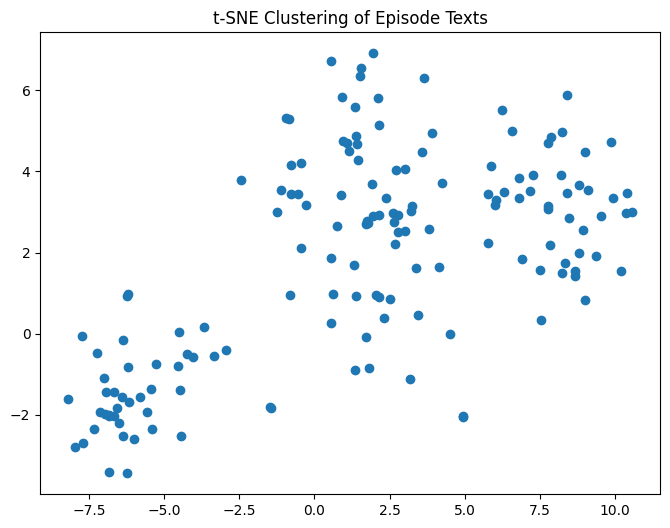

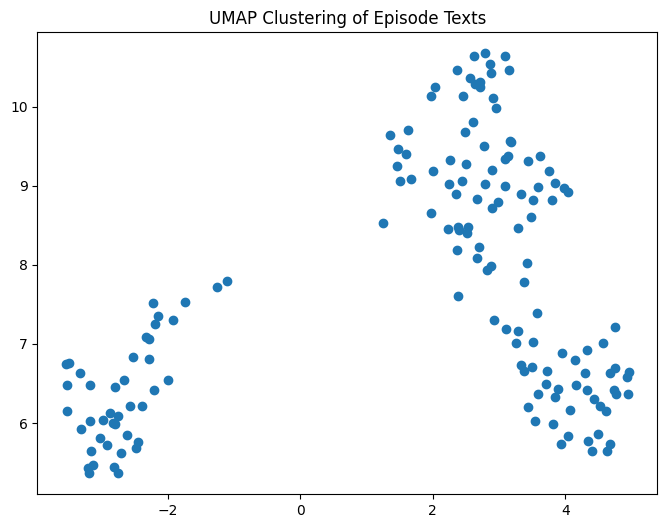

In [25]:
import matplotlib.pyplot as plt

# For t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title('t-SNE Clustering of Episode Texts')
plt.show()

# For UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])
plt.title('UMAP Clustering of Episode Texts')
plt.show()

In [26]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_embeddings)  # Or umap_embeddings

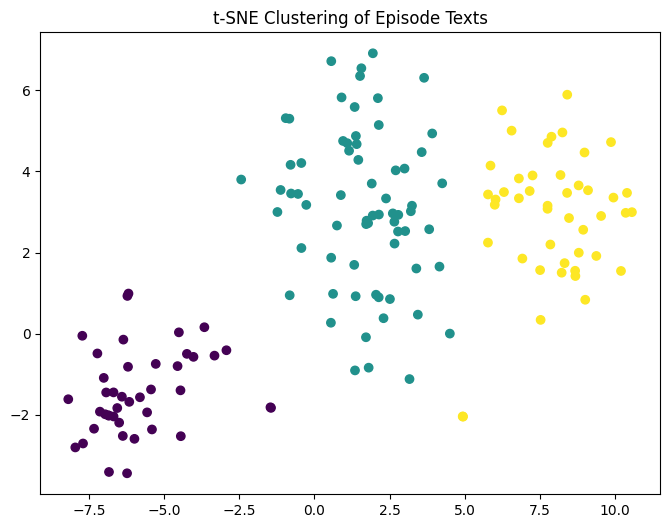

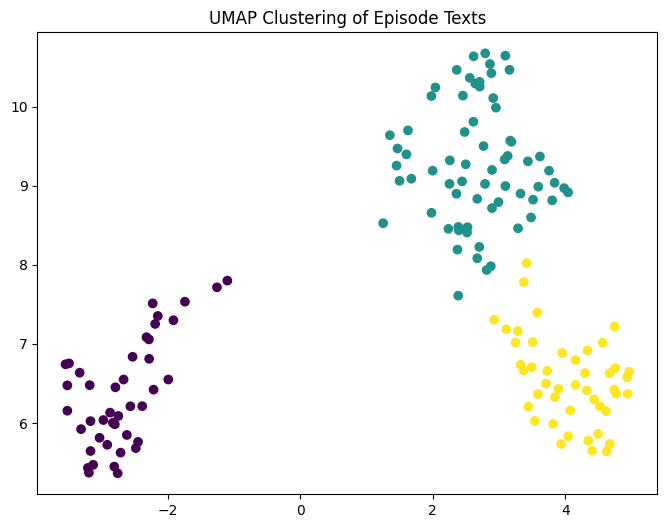

In [27]:
import matplotlib.pyplot as plt

# For t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Clustering of Episode Texts')
plt.show()

# For UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title('UMAP Clustering of Episode Texts')
plt.show()

In [30]:
import pandas as pd

document_names = [os.path.basename(path) for path in episode_paths]

df = pd.DataFrame({'Document': document_names, 'Cluster': cluster_labels})

display(df)

,Document,Cluster
0,مراجعة فيلم بلاك ادم .txt,0
1,ثقافة ال_كانسل_ والحقيقة وراء انتهاء المسار ال...,0
2,لما تروّحي كلميني .txt,1
3,دكتور اسنان الصبح و فوودبلوجر بليل مع عمرو اله...,1
4,عالمغرب ليلة 2 رمضان.txt,2
...,...,...
149,قصة مطعم المحمدي الذي يقوده دكتور جراح - Foodc...,1
150,S1E5 - حكاية بيسو مع الدايت.txt,1
151,الصندوق الغريب في عالم كتابة الافلام.txt,0
152,من لندن الي القاهرة - عسل اسود الحقيقي وصل (Ya...,1


In [31]:
# documents belonging to cluster 0
display(df[df['Cluster'] == 0]['Document'])

,Document
0,مراجعة فيلم بلاك ادم .txt
1,ثقافة ال_كانسل_ والحقيقة وراء انتهاء المسار ال...
13,تحليل افضل مشهد من انمي ديث نوت مع هجوم العمال...
15,الدليل الشامل الكامل للفوز بجائزة الاوسكار (ب...
16,عن افلام الي قتلت عالمها السينمائي.txt
19,الجانب الاسود من هوليود .txt
26,نتكلم عن الحاجات الحلوة في الانتاج المصري.txt
27,اكتر افلام متشوق ليها في ٢٠٢٣.txt
33,البروباجندا والافلام .txt
35,اعلان ديد بول ومراجعة مسلسل رامي .txt


In [32]:
# documents belonging to cluster 1
display(df[df['Cluster'] == 1]['Document'])

,Document
2,لما تروّحي كلميني .txt
3,دكتور اسنان الصبح و فوودبلوجر بليل مع عمرو اله...
5,من علبة بسكوت لمبادا الى اكبر مطعم في مصر - قص...
6,مهندس ام فوودبلوجر ام مطور مطاعم ؟ مع عدني - F...
7,القشطوطه مش دايما موجوده .txt
...,...
148,S1E10 - اضطرابات الشهية عدو قاتل مع ياسو.txt
149,قصة مطعم المحمدي الذي يقوده دكتور جراح - Foodc...
150,S1E5 - حكاية بيسو مع الدايت.txt
152,من لندن الي القاهرة - عسل اسود الحقيقي وصل (Ya...


In [33]:
# documents belonging to cluster 2
display(df[df['Cluster'] == 2]['Document'])

,Document
4,عالمغرب ليلة 2 رمضان.txt
8,عالمغرب ليلة27 رمضان.txt
9,EP5_ جيل الألفية التالتة - الجزء الأول.txt
17,عالمغرب ليلة 14 رمضان.txt
20,فول ستوب .txt
22,عالمغرب ليلة23 رمضان.txt
25,عالمغرب ليلة 17 رمضان.txt
28,إيه المشكلة في الذنوب الصغيرة ؟.txt
30,عالمغرب ليلة 18 رمضان.txt
31,Ep.6 – إيه المشكلة لو مبنصليش ؟.txt
